In [1]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "./LMUData/"
# datasets_name = "Open_MI.tsv"
datasets_name = "Open_MI.tsv.bp"

with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    # 读取第一行（标题行）
    headers = next(tsvreader)
    print("Headers:", headers)

Headers: ['index', 'question', 'answer', 'class', 'image', 'support']


index : open_mi_query_0001
question : This is a
answer : blicket
class : ['blicket', 'dax', 'shously', 'perpo', 'slation']


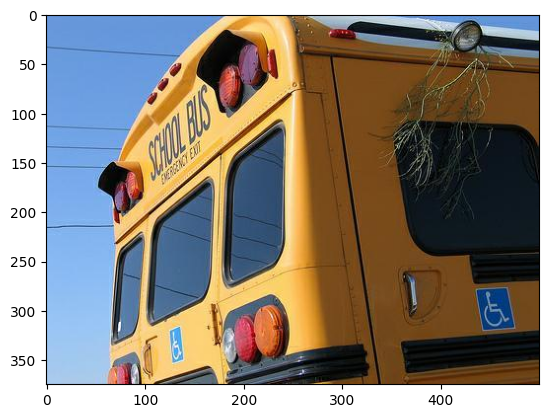

support : {'blicket': {'images': ['open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_1.jpg', 'open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_6.jpg', 'open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_11.jpg', 'open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_16.jpg', 'open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_21.jpg'], 'caption': 'This is a blicket'}, 'slation': {'images': ['open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_2.jpg', 'open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_7.jpg', 'open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_12.jpg', 'open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_17.jpg', 'open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_22.jpg'], 'caption': 'This is a slation'}, 'dax': {'images': ['open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_3.jpg', 'open_mi/support/open_ended_mi_shots_5_ways_5_id_0001_image_8.jpg', 'open_mi/support/open_ended_mi_sho

In [2]:
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            # elif header =="support":
            #     support = eval(row[headers.index(header)])
            #     for key in support:
            #         image_base64 = support[key]['images']
            #         for img in image_base64:
            #             img = Image.open(BytesIO(base64.b64decode(img)))
            #             plt.imshow(img)
            #             plt.show()
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

In [ ]:
path = "/home/zxy/LMUData/"
datasets_name = "MME.tsv"
import csv
# Increase the field size limit
csv.field_size_limit(10000000)


with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    row_counter = 0
    categories_set = set()
    category_count = {}
    for row in tsvreader:
        # get the index of the columns
        category_index = headers.index("category")
        # question_index = headers.index("question")
        # answer_index = headers.index("answer")
        # image_index = headers.index("image")
        # print(
        #     "category: {} \n".format(
        #         # row_counter,
        #         row[category_index],
        #         # row[question_index],
        #         # row[answer_index],
        #     )
        # )
        category = row[category_index]
        categories_set.add(category)
        if category in category_count:
            category_count[category] += 1
        else:
            category_count[category] = 1
        

    print("Total categories: ", len(categories_set))
    print(category_count)

In [31]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "./LMUData/"
# datasets_name = "Open_MI.tsv"
datasets_name = "Open_MI.tsv.merge"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                for key in support:
                    # image_base64 = support[key]['images']
                    # for img in image_base64:
                    #     img = Image.open(BytesIO(base64.b64decode(img)))
                    #     plt.imshow(img)
                    #     plt.show()
                    print(f"{key}: ---------\n ")
                    # for idx in support[key]['image_path']:
                    #     print(f"{idx}")
                    for img, img_path in zip(support[key]['image'], support[key]['image_path']):
                        img = Image.open(BytesIO(base64.b64decode(img)))
                        plt.imshow(img)
                        plt.show()
                        print(f"{img_path}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break